## # 학습목표
- 텍스트 데이터를 머신러닝 입출력용 수치데이터로 변환하는 과정을 이해한다.
- RNN의 특징을 이해하고 시퀀셜한 데이터를 다루는 방법을 이해한다.
- 1-D CNN으로도 텍스트를 처리할 수 있음을 이해한다.
- IMDB와 네이버 영화리뷰 데이터셋을 이용한 영화리뷰 감성 분류 실습을 진행한다.

(https://dbr.donga.com/article/view/1202/article_no/8891/ac/magazine) 링크

### # 텍스트 데이터의 특징
- 텍스트를 어떻게 숫자로 나타낼 것인가..
- 텍스트는 입력의 순서가 중요한데 인공지능 모델에게는 어떻게 적용시켜야 할까...

## # 텍스트를 숫자로 표현하는 방법

In [1]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨 담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


In [2]:
# 위와 같은 식으로 문장을 단어로 쪼개서 딕셔너리 구조로 만들어보기

index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


> 그런데 `텍스트:숫자` 구조가 되어야 하니 순서 바꿔주기

In [3]:
word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [4]:
print(word_to_index['feel'])  # 단어 'feel'은 숫자 인덱스 4로 바뀝니다.

4


> 텍스트를 숫자로 한 번 바꿔서 표현해보기

In [5]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


In [6]:
# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


In [7]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


In [8]:
# DJ's practice
def decode(encoded_list, word_to_index):
    new_sentence = []
    for ind in encoded_list:
        for value, index in word_to_index.items():
            if ind == 1:
                continue
            if index == ind:
                new_sentence.append(value)
    result = ' '.join(new_sentence)
    return result

In [9]:
decode([1, 3, 4, 5], word_to_index)

'i feel hungry'

In [10]:
print(i if i % 2 == 0 else i+10 for i in [1,2,3,4,5])

<generator object <genexpr> at 0x7f3c8d611d50>


In [11]:
# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


## # 임베딩 레이어(Embedding Layer)

> 지금의 'i feel hungry' -> 1, 3, 4, 5 매치는 의미 없는 숫자와의 연결임  
> 그래서 의미가 있는 벡터를 만들고 그것을 학습하는 딥러닝 모델을 만드는 과정임

In [12]:
# 아래 코드는 그대로 실행하시면 에러가 발생할 것입니다. 

import numpy as np
import tensorflow as tf
import os

vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 위 그림과 같이 4차원의 워드 벡터를 가정합니다. 

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# 숫자로 변환된 텍스트 데이터 [[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 에 Embedding 레이어를 적용합니다. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')
output = embedding(raw_inputs)
print(output)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

> Embedding 레이어의 인풋 문장은 길이가 다 같아야 한다.  
> 여기서 aw_inputs의 3개 벡터의 길이는 각각 4, 4, 5  
> 그래서 padding이 필요하다

In [13]:
np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')

array([list([1, 3, 4, 5]), list([1, 3, 6, 7]), list([1, 8, 3, 4, 9])],
      dtype=object)

In [14]:
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
print(raw_inputs)

[[1 3 4 5 0]
 [1 3 6 7 0]
 [1 8 3 4 9]]


In [15]:
# 위에 오류난 것을 padding 추가 후 다시 시도해보기
vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 그림과 같이 4차원의 워드 벡터를 가정합니다.

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# tf.keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정 길이로 맞춰주어야 
# embedding 레이어의 input이 될 수 있음에 주의해 주세요. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype=object)
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[ 0.04694314  0.0040275   0.03234733 -0.00532321]
  [ 0.01458072  0.01792058  0.02315973  0.01939174]
  [-0.01427897 -0.00683196 -0.00556726  0.03361437]
  [ 0.01303739 -0.00495904 -0.0119462  -0.04464803]
  [-0.00979844 -0.01037434  0.04583276  0.04448194]]

 [[ 0.04694314  0.0040275   0.03234733 -0.00532321]
  [ 0.01458072  0.01792058  0.02315973  0.01939174]
  [ 0.04082792 -0.03938426 -0.00587777 -0.0490593 ]
  [-0.02973906 -0.0464872   0.02980584  0.02103685]
  [-0.00979844 -0.01037434  0.04583276  0.04448194]]

 [[ 0.04694314  0.0040275   0.03234733 -0.00532321]
  [ 0.00316907  0.02588257  0.02558431 -0.04665069]
  [ 0.01458072  0.01792058  0.02315973  0.01939174]
  [-0.01427897 -0.00683196 -0.00556726  0.03361437]
  [ 0.03727177 -0.04389333  0.03388802  0.01123264]]], shape=(3, 5, 4), dtype=float32)


## # RNN
> 시퀀스 데이터의 개념 파악  
> 시퀀스 데이터는 입력이 시간의 축을 따라 발생하는 것

In [16]:
# RNN 모델을 사용하여 이전 스텝의 텍스트 데이터를 처리하는 예제 코드를 구현

vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 416       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


### # 꼭 RNN이어야 할까?
> 답을 하자면, 1-D Convolution Neural Network(1-D CNN)를 사용할 수도 있다.  
> 이미지는 2-D CNN을 했는데, 문장은 1차원(단어를 여러 요소로 갖는)으로 해서 넣을 수도 있다.  
> 이러면 그 벡터를 스캐닝하면서 특징을 추출한다.
> 그리고 병렬처리에 RNN보다 더 효율적이라 빠르다.

In [17]:
# 1-D CNN으로 만든 모델 구현

vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

#### 아주 간단히는 Global Average Pooling layer만 놓아도 됨
> 이 방식은 전체 문장 중에서 단 하나의 가장 중요한 단어만 피처로 추출하여 그것으로 문장의 긍정/부정을 평가하는 방식이라고 생각할 수 있는데, 의외로 성능이 잘 나올 수도 있음

In [18]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


## # IMDB 데이터 분석

> `.load_data()`에 `num_words=`로 주는 숫자만큼 most frequent하게 등장하는 애들만 word_to_index 딕셔너리 같은 사전에 담겨서 데이터를 생성한다.  
> 나머지는 `ovv_char`로 나타난단다.

In [19]:
# tensorflow 데이터셋으로 50000개가 있는데
# 25000개는 train, 25000개는 test로 사용하도록 올려놓음
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


훈련 샘플 개수: 25000, 테스트 개수: 25000


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [20]:
# 실제 데이터 확인

print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


> 이미 숫자로 encode되어 있다.  
> 데이터셋에 담긴 단어사전도 한 번 확인해보자

In [21]:
# .get_word_index()로 가져오기
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

the
1


In [22]:
index_to_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [23]:
word_to_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [24]:
0 in index_to_word

False

In [25]:
1 in index_to_word

True

> 여기서 하는 전처리는 Tensorflow 튜토리얼에서의 전처리를 따왔단다.

In [26]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.

<BOS>
4
the


In [27]:
index_to_word[0]

'<PAD>'

In [28]:
# encode된 게 제대로 우리 decode 함수에 작동하는지 확인
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

> padding 추가가 필요함  
> 근데 padding의 max_len 값도 사실 모델의 성능, 속도에 많은 영향을 미친다.  
> 적절한 값을 찾기 위해선 전체 데이터셋의 분포를 확인하는 게 좋음

In [29]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


> 여기서는 정규분포의 특성을 이용해서 평균 + 2*std인 곳이 전체 데이터의 약 95%를 차지한다는 가설을 갖고 max_len을 설정해보고 있다.

> padding을 pre 혹은 post로 하느냐에 따라 성능이 달라지는데 확인 필요

In [31]:
# post로 패딩한 데이터
x_train_post = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test_post = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train_post.shape)

(25000, 580)


In [32]:
# pre로 패딩한 데이터
x_train_pre = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test_pre = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train_pre.shape)

(25000, 580)


## # 모델 직접 설계 및 훈련

In [36]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model_lstm = tf.keras.Sequential()
# [[YOUR CODE]]
model_lstm.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_lstm.add(tf.keras.layers.LSTM(16))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model_lstm.add(tf.keras.layers.Dense(16, activation='relu'))
model_lstm.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_lstm.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 162,401
Trainable params: 162,401
Non-trainable params: 0
_________________________________________________________________


In [35]:
# validation set 10000건 분리
# post 데이터 사용
x_val_post = x_train_post[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train_post = x_train_post[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train_post.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


In [37]:
# 모델 학습
# post train, post val 사용
model_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model_lstm.fit(partial_x_train_post,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val_post, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 7s 137ms/step - loss: 0.6931 - accuracy: 0.5048 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 2/20
30/30 [==============================] - 3s 114ms/step - loss: 0.6930 - accuracy: 0.5121 - val_loss: 0.6930 - val_accuracy: 0.5017
Epoch 3/20
30/30 [==============================] - 3s 115ms/step - loss: 0.6924 - accuracy: 0.5101 - val_loss: 0.6929 - val_accuracy: 0.5024
Epoch 4/20
30/30 [==============================] - 3s 113ms/step - loss: 0.6896 - accuracy: 0.5234 - val_loss: 0.6887 - val_accuracy: 0.5070
Epoch 5/20
30/30 [==============================] - 3s 113ms/step - loss: 0.6833 - accuracy: 0.5241 - val_loss: 0.6944 - val_accuracy: 0.4982
Epoch 6/20
30/30 [==============================] - 3s 113ms/step - loss: 0.6923 - accuracy: 0.5082 - val_loss: 0.6929 - val_accuracy: 0.5037
Epoch 7/20
30/30 [==============================] - 3s 112ms/step - loss: 0.6888 - accuracy: 0.5272 - val_loss: 0.6914 - val_accuracy: 0.5082
Epoch 

In [38]:
# 테스트셋으로 평가하기
results = model_lstm.evaluate(x_test_post,  y_test, verbose=2)

print(results)

782/782 - 23s - loss: 0.5926 - accuracy: 0.7184
[0.5926341414451599, 0.7183600068092346]


In [39]:
# 그래프 그릴 항목 확인
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


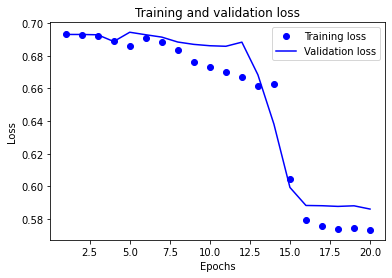

In [40]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

> validation loss와 train loss간에 이격이 발생하는 지점이 있다면 그 이상의 트레이닝은 무의미해짐

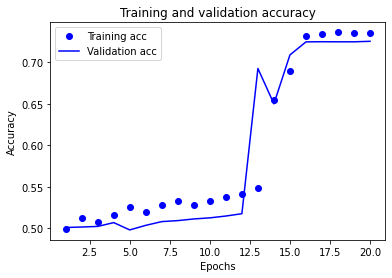

In [41]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

> 마찬가지로 Training and validation accuracy를 그려 보아도 유사한 인사이트를 얻을 수 있음

In [42]:
# padding 'pre'로 했을 때의 모델 accuracy 확인

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model_lstm = tf.keras.Sequential()
# [[YOUR CODE]]
model_lstm.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_lstm.add(tf.keras.layers.LSTM(16))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model_lstm.add(tf.keras.layers.Dense(16, activation='relu'))
model_lstm.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

# validation set 10000건 분리
# post 데이터 사용
x_val_pre = x_train_pre[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train_pre = x_train_pre[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train_pre.shape)
print(partial_y_train.shape)

# 모델 학습
# post train, post val 사용
model_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model_lstm.fit(partial_x_train_pre,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val_pre, y_val),
                    verbose=1)

(15000, 580)
(15000,)
Epoch 1/20
30/30 [==============================] - 6s 134ms/step - loss: 0.6921 - accuracy: 0.5105 - val_loss: 0.6831 - val_accuracy: 0.5868
Epoch 2/20
30/30 [==============================] - 3s 114ms/step - loss: 0.6680 - accuracy: 0.6231 - val_loss: 0.6538 - val_accuracy: 0.6656
Epoch 3/20
30/30 [==============================] - 3s 110ms/step - loss: 0.6059 - accuracy: 0.7441 - val_loss: 0.5455 - val_accuracy: 0.8133
Epoch 4/20
30/30 [==============================] - 3s 106ms/step - loss: 0.4876 - accuracy: 0.8360 - val_loss: 0.4249 - val_accuracy: 0.8412
Epoch 5/20
30/30 [==============================] - 3s 106ms/step - loss: 0.3515 - accuracy: 0.8826 - val_loss: 0.3320 - val_accuracy: 0.8684
Epoch 6/20
30/30 [==============================] - 3s 105ms/step - loss: 0.2389 - accuracy: 0.9209 - val_loss: 0.3178 - val_accuracy: 0.8712
Epoch 7/20
30/30 [==============================] - 3s 104ms/step - loss: 0.1859 - accuracy: 0.9404 - val_loss: 0.3193 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


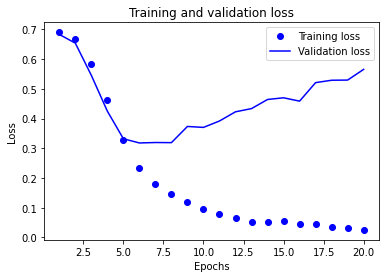

In [46]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

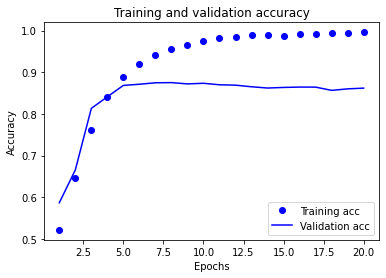

In [47]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

> `pre로 padding한 것은 압도적으로 예측이 좋게 나온다.  
> 이 경우 EPOCH를 작게 하는 것이 좋겠다.

## # Word2Vec 적용
> 이미 Embedding 레이어를 통해 적용했지만 구체적으로 알아보기  
> 워드 공간에 유의미하게 형성되어 있는지 파악해보기  
> 해당 word vector를 다룰 때는 `gensim` 패키지 사용

In [49]:
embedding_layer = model_lstm.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [54]:
print(type(model_lstm.layers))
model_lstm.layers

<class 'list'>


In [59]:
print(type(weights))
print(weights.shape)
weights

<class 'numpy.ndarray'>
(10000, 16)


array([[-0.00769743, -0.02441218,  0.0074533 , ...,  0.02452769,
        -0.07689153, -0.05259864],
       [ 0.10114594, -0.10399839,  0.10293962, ..., -0.04611583,
        -0.20221464, -0.05011757],
       [-0.02898518, -0.02474586,  0.01796851, ...,  0.05647976,
         0.00189297, -0.00809398],
       ...,
       [ 0.05925551, -0.05830109,  0.03919606, ..., -0.02791787,
        -0.04822203, -0.05354132],
       [ 0.04130551,  0.01399222,  0.04475417, ...,  0.0182888 ,
        -0.08064327, -0.0041659 ],
       [ 0.02437731, -0.01732   ,  0.03807655, ..., -0.07236972,
        -0.06833529, -0.07756536]], dtype=float32)

> 단어갯수만큼 행이 있고, out_dim으로 설정한 만큼의 열로 옆으로 늘어나 있는 행렬이다

In [60]:
embedding_layer.get_weights()

[array([[-0.00769743, -0.02441218,  0.0074533 , ...,  0.02452769,
         -0.07689153, -0.05259864],
        [ 0.10114594, -0.10399839,  0.10293962, ..., -0.04611583,
         -0.20221464, -0.05011757],
        [-0.02898518, -0.02474586,  0.01796851, ...,  0.05647976,
          0.00189297, -0.00809398],
        ...,
        [ 0.05925551, -0.05830109,  0.03919606, ..., -0.02791787,
         -0.04822203, -0.05354132],
        [ 0.04130551,  0.01399222,  0.04475417, ...,  0.0182888 ,
         -0.08064327, -0.0041659 ],
        [ 0.02437731, -0.01732   ,  0.03807655, ..., -0.07236972,
         -0.06833529, -0.07756536]], dtype=float32)]

In [61]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model_lstm.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [66]:
vectors[4, :]

array([-0.00974652, -0.02607295, -0.02527144, -0.03768079, -0.00119043,
        0.04774732, -0.01291266,  0.05074356,  0.01908138,  0.0233574 ,
       -0.05896892,  0.02538653, -0.03822448,  0.02092041,  0.03420791,
        0.00914042], dtype=float32)

> `gensim`에서 제공하는 패키지를 이용해 위에 남긴 임베딩 파라미터를 읽어서 word vector로 활용

In [67]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


array([-0.02853958,  0.04240824,  0.03001517,  0.01901824,  0.03709544,
       -0.02492859,  0.00222227, -0.02635476, -0.001752  , -0.01180111,
        0.0696243 , -0.0443258 ,  0.01111723, -0.00723196, -0.05406441,
       -0.03796557], dtype=float32)

In [69]:
dir(word_vectors)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key',
 'init_sims',
 'intersect_word2vec_

> 해당 패키지는 요구된 형식으로 저장된 txt를 불러오면 우리가 원하는 token에 맞게 word vector를 반환해줄 수 있는 NLP 전용 패키지로 보인다.

In [73]:
# 재미있는 실험도 할 수 있다.
# 이런 식으로 비슷한 단어라고 컴퓨터가 뽑아내는 단어들을 볼 수도 있다.
word_vectors.similar_by_word("love")

[('disappoint', 0.9425361752510071),
 ('anime', 0.9252254366874695),
 ('ages', 0.9018864035606384),
 ('networks', 0.8915086388587952),
 ('2001', 0.887840986251831),
 ('rewarded', 0.8859958052635193),
 ('youthful', 0.8825443387031555),
 ('freaks', 0.8819042444229126),
 ('groundbreaking', 0.8807623386383057),
 ('cheers', 0.8783416152000427)]

> 얼핏 봐도 'love'랑 많이 차이가 난다.  
> 이는 우리의 데이터가 그만큼 워드벡터를 훈련시키기에 정교하지 않거나 수가 적거나 하다는 뜻.  
> 이제는 구글에서 제공하는 Word2Vec이라는 pre-trained 된 워드 임베딩 모델 사용  
> 1억 개의 단어로 구성된 Google News Dataset을 바탕으로 학습했고,  
> 총 300만 개의 단어를 300차원으로 표현했음  
> pre-trained된 임베딩 모델을 쓰는 게 왜 좋은지에 대한 글(https://ratsgo.github.io/natural%20language%20processing/2019/09/12/embedding/)

> 데이터는 이미 LMS에서는 다운로드 되어 있다.(심볼릭 링크로 연결했음)  
> 추후에는 내가 다운받아야 할 것이다.

In [74]:
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
# 300만 개 다 가져오면 메모리 에러가 날 수 있어서 limit을 100만개로 둠

vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [75]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("love")

[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547304749488831),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

> 이제 윗 임베딩 레이어에서 썼던 워드벡터에서 각 단어에 맞는 벡터 값을 지금 가져온 word2vec 벡터로 바꾼 행렬을 만든다

In [76]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

array([[0.81109798, 0.37128923, 0.92756274, ..., 0.62781147, 0.06500943,
        0.16883012],
       [0.03807763, 0.25055212, 0.14058922, ..., 0.73076174, 0.496779  ,
        0.27756581],
       [0.69890595, 0.62222886, 0.15724609, ..., 0.49042867, 0.99515557,
        0.80110967],
       [0.92345638, 0.58310481, 0.48136944, ..., 0.36779451, 0.41038374,
        0.2216601 ]])

In [80]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수 

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 580, 300)          3000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 114, 16)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [82]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train_post,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val_post, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 17s 492ms/step - loss: 0.6881 - accuracy: 0.5381 - val_loss: 0.6488 - val_accuracy: 0.6265
Epoch 2/20
30/30 [==============================] - 12s 402ms/step - loss: 0.6133 - accuracy: 0.6676 - val_loss: 0.5003 - val_accuracy: 0.7887
Epoch 3/20
30/30 [==============================] - 12s 393ms/step - loss: 0.4251 - accuracy: 0.8329 - val_loss: 0.4077 - val_accuracy: 0.8141
Epoch 4/20
30/30 [==============================] - 13s 420ms/step - loss: 0.2911 - accuracy: 0.8838 - val_loss: 0.3340 - val_accuracy: 0.8567
Epoch 5/20
30/30 [==============================] - 13s 434ms/step - loss: 0.2032 - accuracy: 0.9291 - val_loss: 0.3035 - val_accuracy: 0.8726
Epoch 6/20
30/30 [==============================] - 13s 432ms/step - loss: 0.1529 - accuracy: 0.9513 - val_loss: 0.3035 - val_accuracy: 0.8728
Epoch 7/20
30/30 [==============================] - 11s 373ms/step - loss: 0.1116 - accuracy: 0.9707 - val_loss: 0.3631 - val_accuracy: 0.8540

In [84]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test_post,  y_test, verbose=2)

print(results)

782/782 - 8s - loss: 0.4965 - accuracy: 0.8631
[0.49650734663009644, 0.8630800247192383]


## # 결론
> 위에서는 accuracy: 0.7184 이었던 점으로 보아 wordvector가 유의미하게 잘 구성되면 정확도가 높아간다.  
> 이 경우엔 심지어 약 15%가 올라갔다.